In [86]:
%pip install PySDDP
%pip install tabulate

from PySDDP.Pen import Newave
import numpy as np
import plotly.graph_objects as go
from matplotlib import pyplot as plt
from random import randint
import os
from typing import List
from PySDDP.hidr import hidr

# Caminho do Newave com os dados publicados em agosto

Caminho = './NW202308_UNSI_ACL'

PMOSET2023 = Newave(Caminho)
print(os.listdir(Caminho))

Note: you may need to restart the kernel to use updated packages.

OK! Leitura do CASO.DAT realizada com sucesso.
OK! Leitura do ARQUIVOS.DAT realizada com sucesso.
OK! Leitura do DGER.DAT realizada com sucesso.
OK! Leitura do HIDR.DAT realizada com sucesso.
OK! Leitura do VAZOES.DAT realizada com sucesso.
OK! Leitura do MODIF.DAT realizada com sucesso. ( 99 Usinas Hidraulicas Modificadas )
OK! Leitura do EXPH.DAT realizada com sucesso. ( 2 Usinas Hidraulicas Expandidas )
OK! Leitura do CONFHD.DAT realizada com sucesso.
OK! Leitura do REE.DAT realizada com sucesso. ( 12 Reservatórios Equivalentes de Energia Foram Lidos )
OK! Leitura do SISTEMA.DAT realizada com sucesso.
['ADTERM.DAT', 'AGRINT.DAT', 'ARQUIVOS.DAT', 'BID.DAT', 'CASO.DAT', 'CDEFVAR.DAT', 'CLAST.DAT', 'CONFHD.DAT', 'CONFT.DAT', 'CURVA.DAT', 'CVAR.DAT', 'C_ADIC.DAT', 'DGER.DAT', 'DSVAGUA.DAT', 'ELNINO.DAT', 'ENSOAUX.DAT', 'EXPH.DAT', 'EXPT.DAT', 'FORMAT.TMP', 'GHMIN.DAT', 'GTMINPAT.DAT', 'GTMIN_CCEE_082023.xlsx', 'HIDR.DAT'

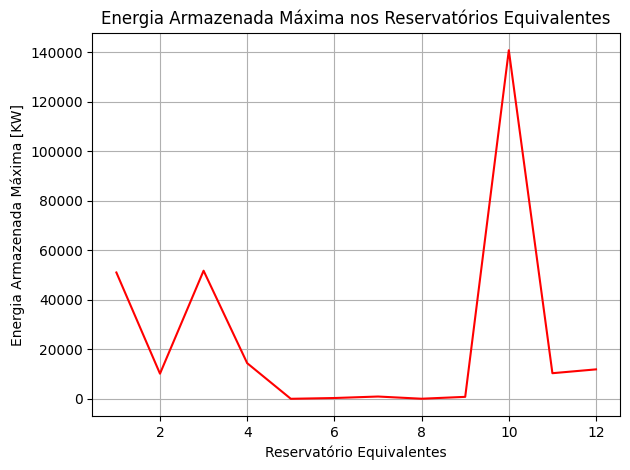

[50990.91, 10145.283, 51714.68, 14380.894, 0.0, 313.7017, 914.30707, 28.106716, 785.95123, 140717.42, 10333.258, 11880.526]


In [87]:
x = np.arange(0,12,1)

EAmax_PySDDP = [PMOSET2023.ree.ree['earmax'][PMOSET2023.ree.ree['codigo'].index(i+1)][0][0] for i in range(12)]

plt.plot(x+1, EAmax_PySDDP, color='r')
plt.title('Energia Armazenada Máxima nos Reservatórios Equivalentes')
plt.xlabel('Reservatório Equivalentes')
plt.ylabel('Energia Armazenada Máxima [KW]')

plt.grid()
plt.tight_layout()
plt.show()

print(EAmax_PySDDP)

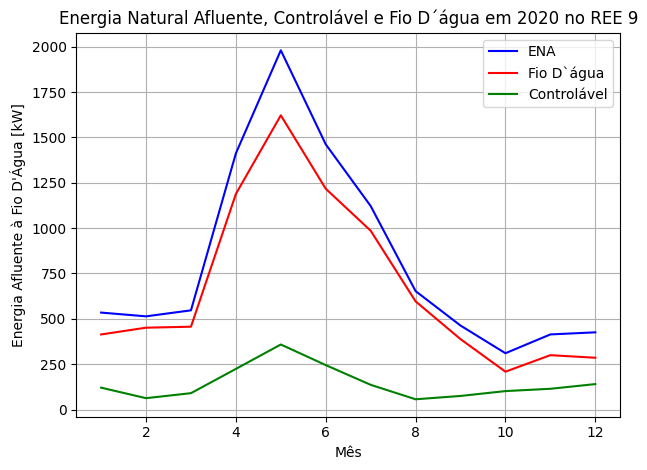

In [90]:
reservatorio = 9
ano = 2020

ENA_PySDDP = PMOSET2023.ree.ree['ena_bruta'][PMOSET2023.ree.ree['codigo'].index(reservatorio)][0,:,ano-1931]
Efio_PySDDP = PMOSET2023.ree.ree['efio_bruta'][PMOSET2023.ree.ree['codigo'].index(reservatorio)][0,:,ano-1931]
EC_PySDDP = PMOSET2023.ree.ree['ec'][PMOSET2023.ree.ree['codigo'].index(reservatorio)][0,:,ano-1931]
plt.plot(x+1, ENA_PySDDP, color='b',label="ENA")
plt.plot(x+1, Efio_PySDDP, color='r',label="Fio D`água")
plt.plot(x+1, EC_PySDDP, color='g',label="Controlável")
plt.title('Energia Natural Afluente, Controlável e Fio D´água em ' + str(ano) + " no REE " + str(reservatorio))
plt.xlabel('Mês')
plt.ylabel('Energia Afluente à Fio D\'Água [kW]')

plt.legend()

plt.grid()
plt.tight_layout()
plt.show()